In [1]:
import pandas as pd
df= pd.read_csv('NYC_airbnb.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [2]:
df.shape

(27124, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 16 columns):
id                                27124 non-null int64
name                              27109 non-null object
host_id                           27124 non-null int64
host_name                         27110 non-null object
neighbourhood_group               27124 non-null object
neighbourhood                     27124 non-null object
latitude                          27124 non-null float64
longitude                         27124 non-null float64
room_type                         27124 non-null object
price                             27124 non-null int64
minimum_nights                    27124 non-null int64
number_of_reviews                 27124 non-null int64
last_review                       22675 non-null object
reviews_per_month                 22675 non-null float64
calculated_host_listings_count    27124 non-null int64
availability_365                  27124 non-null int64

In [4]:
df['name'].unique()
df.drop(['name'], axis=1, inplace=True)

In [5]:
df['id'].unique()
df.drop(['id'], axis=1, inplace=True)

In [6]:
df.drop(['host_name'], axis=1, inplace=True)

In [7]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [8]:
df.drop(['last_review'], axis=1, inplace=True)

In [9]:
df.isnull().sum()

host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 4449
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [18]:
df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             90.223176
Brooklyn         126.567866
Manhattan        182.360216
Queens           101.439260
Staten Island    139.159763
Name: price, dtype: float64

In [77]:
df.drop(['reviews_per_month'], axis=1, inplace=True)

In [78]:
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [79]:
df.tail()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
27119,121809482,Manhattan,Midtown,40.75089,-73.97060,Private room,145,1,25,2,0
27120,55858529,Brooklyn,Bedford-Stuyvesant,40.68444,-73.93804,Private room,40,2,101,3,8
27121,21341524,Manhattan,East Harlem,40.79104,-73.94144,Entire home/apt,180,2,3,1,41
27122,155691570,Queens,East Elmhurst,40.76555,-73.87232,Private room,40,1,76,5,0
27123,13010274,Manhattan,Washington Heights,40.83433,-73.94304,Shared room,75,1,0,1,0


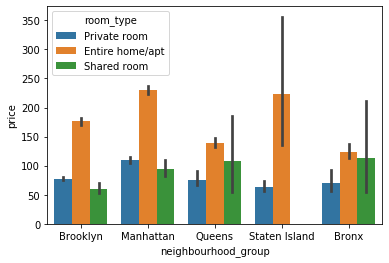

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot("neighbourhood_group", "price",data=df,hue="room_type");

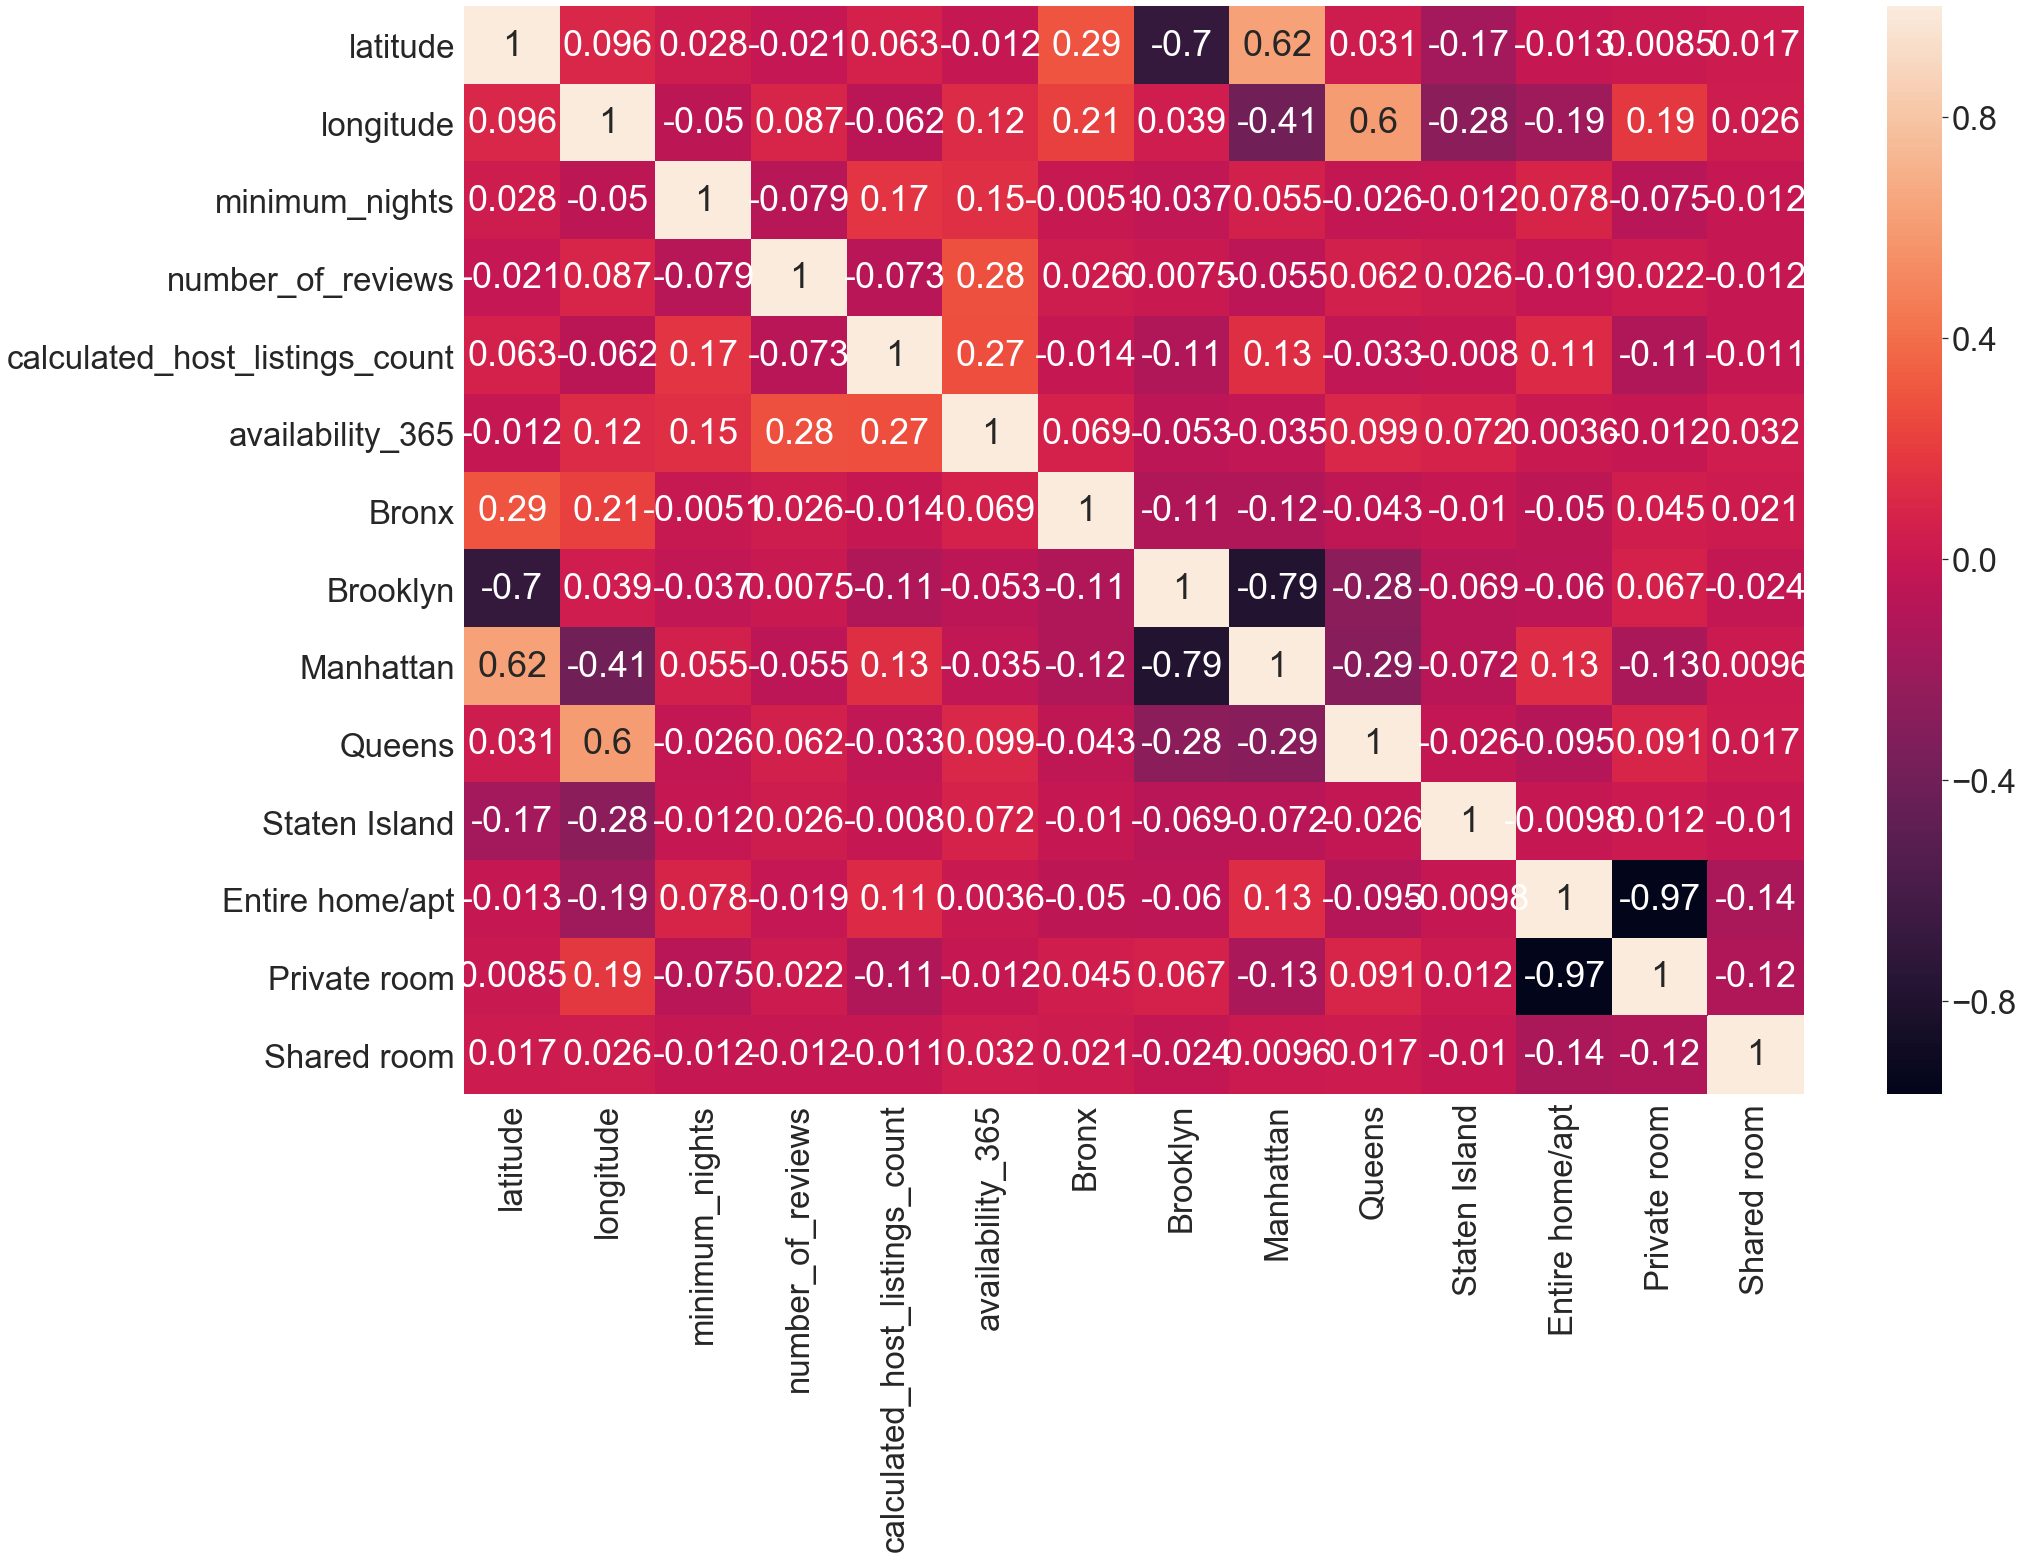

In [128]:
# correlation matrix
sns.set(font_scale=3)
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot=True)

C:\Users\Shrishti Narle\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


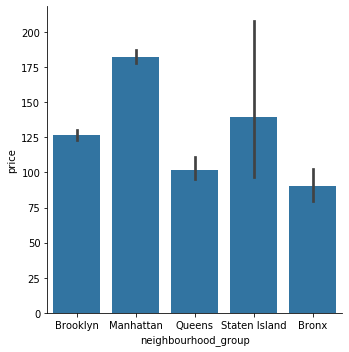

In [81]:
g = sns.FacetGrid(df, height=5, aspect=.99)
g.map(sns.barplot, "neighbourhood_group", "price");

C:\Users\Shrishti Narle\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


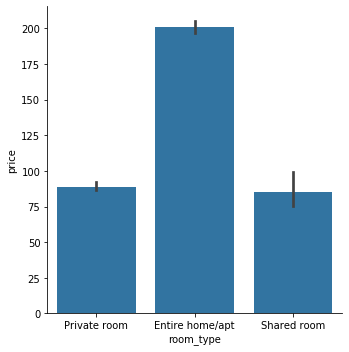

In [82]:
g = sns.FacetGrid(df, height=5, aspect=.99)
g.map(sns.barplot, "room_type", "price");

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


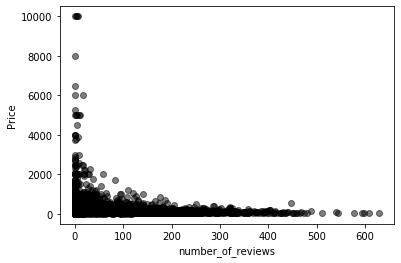

In [83]:
colors = (0,0,0)

plt.scatter(df['number_of_reviews'] ,df['price'] , c=colors, alpha=0.5)
plt.xlabel('number_of_reviews')
plt.ylabel('Price')
plt.show()

In [84]:
df['neighbourhood_group'].unique()
f=pd.get_dummies(df['neighbourhood_group'])
df.drop('neighbourhood_group', axis=1, inplace=True)
df=pd.concat([df,f], axis=1)

Text(0.5, 1.0, 'Price Distribution Plot')

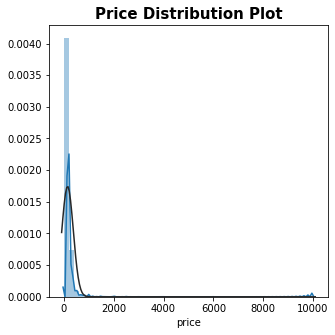

In [91]:
from scipy import stats

plt.figure(figsize=(5,5))
sns.distplot(df['price'],fit= stats.norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

Here the Data of price is right skewed so we need to normalix=ze this data. A log transforation would be better to remove the skeweness and  normalize the price

In [92]:
df['price_log'] = np.log(df.price+1)

Text(0.5, 1.0, 'Price Distribution Plot')

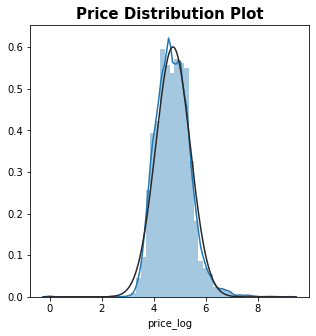

In [94]:
plt.figure(figsize=(5,5))
sns.distplot(df['price_log'],fit= stats.norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

In [18]:
df.head()

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,2787,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0,1,0,0,0
1,2845,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,0,0,1,0,0
2,4632,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,0,0,1,0,0
3,4869,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,0,1,0,0,0
4,7192,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,0,0,1,0,0


In [95]:
df.drop('host_id', axis=1, inplace=True)
df.drop('neighbourhood', axis=1, inplace=True)
df.drop('price',axis=1,inplace=True)

In [96]:
df.head()

,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,price_log
0,40.64749,-73.97237,Private room,1,9,6,365,0,1,0,0,0,5.010635
1,40.75362,-73.98377,Entire home/apt,1,45,2,355,0,0,1,0,0,5.420535
2,40.80902,-73.94190,Private room,3,0,1,365,0,0,1,0,0,5.017280
3,40.68514,-73.95976,Entire home/apt,1,270,1,194,0,1,0,0,0,4.499810
4,40.79851,-73.94399,Entire home/apt,10,9,1,0,0,0,1,0,0,4.394449


In [97]:
df.room_type.unique()
f=pd.get_dummies(df['room_type'])
df.drop('room_type', axis=1, inplace=True)
df=pd.concat([df,f], axis=1)

In [98]:
df.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,price_log,Entire home/apt,Private room,Shared room
0,40.64749,-73.97237,1,9,6,365,0,1,0,0,0,5.010635,0,1,0
1,40.75362,-73.98377,1,45,2,355,0,0,1,0,0,5.420535,1,0,0
2,40.80902,-73.94190,3,0,1,365,0,0,1,0,0,5.017280,0,1,0
3,40.68514,-73.95976,1,270,1,194,0,1,0,0,0,4.499810,1,0,0
4,40.79851,-73.94399,10,9,1,0,0,0,1,0,0,4.394449,1,0,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 15 columns):
latitude                          27124 non-null float64
longitude                         27124 non-null float64
minimum_nights                    27124 non-null int64
number_of_reviews                 27124 non-null int64
calculated_host_listings_count    27124 non-null int64
availability_365                  27124 non-null int64
Bronx                             27124 non-null uint8
Brooklyn                          27124 non-null uint8
Manhattan                         27124 non-null uint8
Queens                            27124 non-null uint8
Staten Island                     27124 non-null uint8
price_log                         27124 non-null float64
Entire home/apt                   27124 non-null uint8
Private room                      27124 non-null uint8
Shared room                       27124 non-null uint8
dtypes: float64(3), int64(4), uint8(8)
memory usage: 1.7 MB


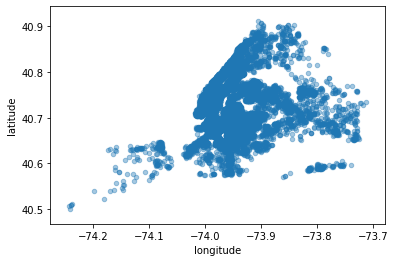

In [101]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
plt.show()

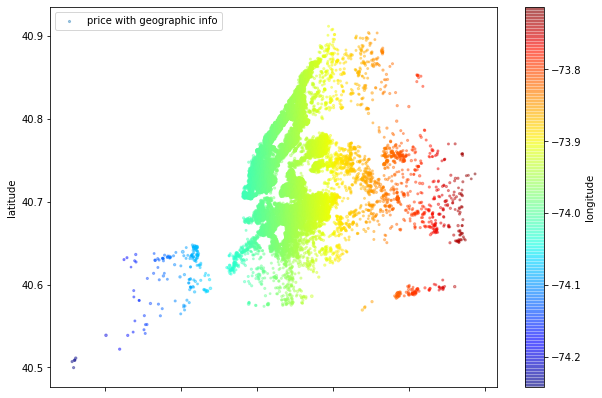

In [103]:
df.plot(kind="scatter", x="longitude", y="latitude",
    s=df['price_log'], label="price with geographic info"
      ,c='longitude' , cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

In [105]:
y= pd.DataFrame(df['price_log'])
df.drop('price_log', axis=1, inplace=True)

In [106]:
X= pd.DataFrame(df)

In [107]:
y.head()

,price_log
0,5.010635
1,5.420535
2,5.017280
3,4.499810
4,4.394449


In [108]:
X.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,40.64749,-73.97237,1,9,6,365,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,1,45,2,355,0,0,1,0,0,1,0,0
2,40.80902,-73.94190,3,0,1,365,0,0,1,0,0,0,1,0
3,40.68514,-73.95976,1,270,1,194,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,10,9,1,0,0,0,1,0,0,1,0,0


In [109]:
#preprocessing steps: spliting the dataset
#scaling train and test datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

scaler = MinMaxScaler() 

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


In [110]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression(normalize=True)
lreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [187]:
predictions = lreg.predict(X_test)
pred=predictions.reshape(-1)
pred

array([4.95084969, 5.37189465, 4.98938686, ..., 5.16216627, 5.16860157,
       4.93011304])

In [189]:
lreg.coef_

#Price = β0+(-0.24)*latitude +(-1.85)*longitude + (-1.69)*minimum_nights + (-0.36)*number_of_reviews + (-0.40)*calculated_host_listings_count + 
#        ( 0.27)* availability_365 + ( -0.08)* Bronx + ( -0.12)* Brooklyn + (  0.14)* Manhattan + ( 0.0245)* Queens + 
#        ( -0.90)* Staten Island + ( 0.38)* Entire home/apt + (-0.337)* Private room + (-0.612)* Shared room 
#latitude	longitude	minimum_nights	number_of_reviews	calculated_host_listings_count	
#availability_365	Bronx	Brooklyn	Manhattan	Queens	
#Staten Island	Entire home/apt	Private room	Shared room

array([[-0.23980523, -1.8486914 , -1.69559877, -0.35701162, -0.40358033,
         0.27461152, -0.08032247, -0.1176342 ,  0.1355958 ,  0.02451252,
        -0.89940666,  0.37619489, -0.33711105, -0.61262048]])

In [181]:
y_test_np=np.array(y_test)
y_test_shape=y_test_np.reshape(-1)

In [114]:
from sklearn import metrics
import numpy as np

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [115]:
print_evaluate(y_test, lreg.predict(X_test))

MAE: 0.3469999212607591
MSE: 0.22979465985285966
RMSE: 0.47936902262542963
R2 Square 0.47757826154829264


In [116]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predictions.flatten()}).head(20)

error_airbnb.head(5)

,Actual Values,Predicted Values
0,5.170484,4.950850
1,5.673323,5.371895
2,4.248495,4.989387
3,4.330733,4.753959
4,4.564348,4.961424


In [138]:
df2 = pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': predictions.flatten()})
df2.head()

,Actual,Predicted
0,5.170484,4.950850
1,5.673323,5.371895
2,4.248495,4.989387
3,4.330733,4.753959
4,4.564348,4.961424


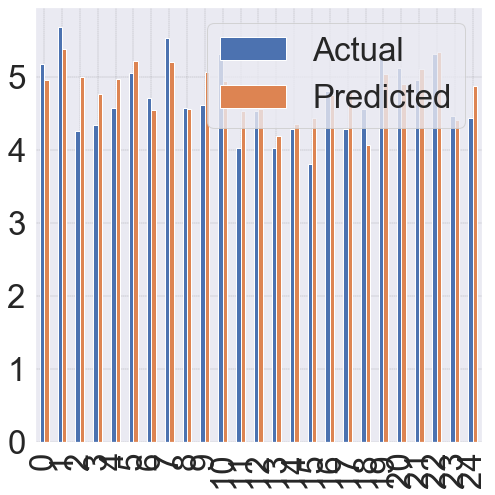

In [158]:
df1=df2.head(25)
df1.plot(kind='bar',figsize=(8,8))
plt.grid( linestyle='-', linewidth='0.25', color='green')
plt.grid(linestyle=':', linewidth='0.25', color='black')
plt.show()

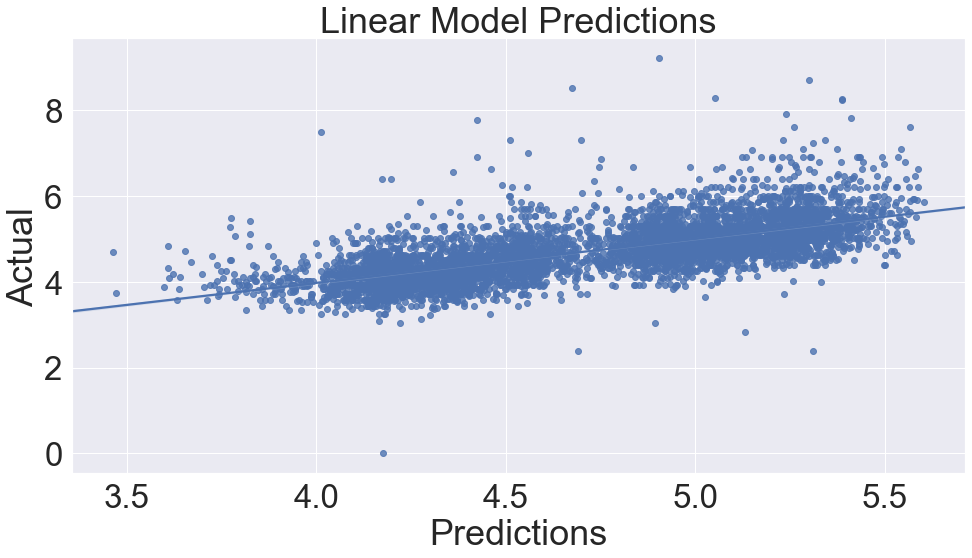

In [182]:
plt.figure(figsize=(16,8))
sns.regplot(pred,y_test_shape)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.show()